In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
%matplotlib inline

In [86]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Clustering.ipynb',
 'debug.log',
 'finaltest.jpg',
 'lonly.jpg',
 'test2.jpg',
 'test_img.jpg',
 'test_img1.JPG']

In [162]:
image=img.imread('test_img.jpg')

In [163]:
image

array([[[186,  47,   6],
        [186,  47,   6],
        [186,  47,   4],
        ...,
        [181,  48,   3],
        [180,  47,   2],
        [179,  46,   1]],

       [[186,  47,   6],
        [187,  48,   7],
        [188,  49,   6],
        ...,
        [183,  50,   5],
        [182,  49,   4],
        [181,  48,   3]],

       [[186,  47,   6],
        [188,  49,   8],
        [190,  51,   8],
        ...,
        [186,  53,   8],
        [185,  52,   7],
        [183,  50,   5]],

       ...,

       [[176,  51,   5],
        [195,  73,  24],
        [206,  84,  33],
        ...,
        [224, 176, 153],
        [195, 129,  97],
        [178, 102,  66]],

       [[184,  62,  13],
        [200,  80,  28],
        [206,  89,  35],
        ...,
        [219, 163, 136],
        [191, 117,  80],
        [175,  92,  50]],

       [[189,  69,  17],
        [200,  83,  29],
        [206,  89,  35],
        ...,
        [211, 154, 124],
        [187, 109,  70],
        [173,  86,  41]]

In [165]:
image.shape

(332, 332, 3)

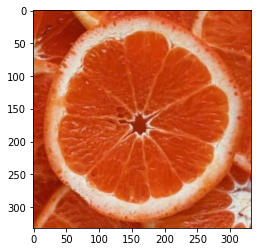

In [164]:
plt.imshow(image)

In [166]:
red=[]
blue=[]
green=[]

In [167]:
for row in image:
    for temp_r,temp_g,temp_b in row:
        red.append(temp_r)
        green.append(temp_g)
        blue.append(temp_b)

In [168]:
df=pd.DataFrame({'red':red,'blue':blue,'green':green})

In [169]:
df.head()

,red,blue,green
0,186,6,47
1,186,6,47
2,186,4,47
3,186,4,47
4,188,6,49


In [170]:
df.red.max()

255

In [171]:
from sklearn.cluster import KMeans

In [172]:
sse=[]

In [173]:
for k in range(1,8):
    print(k)
    model=KMeans(n_clusters=k)
    model.fit(df[['red','blue','green']])
    sse.append(model.inertia_)

1
2
3
4
5
6
7


In [174]:
k_value=np.arange(1,8)

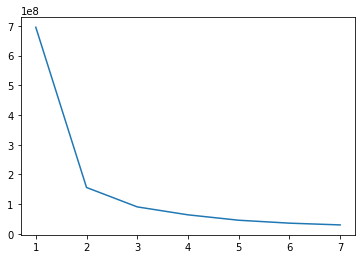

In [175]:
plt.plot(k_value,sse)
plt.show()

In [16]:
#Using elbow method we take 3 as number of clusters

In [176]:
model=KMeans(n_clusters=2)

In [177]:
model.fit(df[['red','green','blue']])

KMeans(n_clusters=2)

In [178]:
model.inertia_

155752150.20298716

In [179]:
cluster_centers=model.cluster_centers_

In [180]:
cluster_centers

array([[226.11907406, 178.27223029, 148.55052533],
       [192.89557655,  67.61627693,  22.32878701]])

In [181]:
predicted_cluster=model.predict(df[['red','green','blue']])

In [182]:
df['predicted_cluster']=predicted_cluster

In [183]:
total_values=df.predicted_cluster.unique()

In [184]:
total_values

array([1, 0], dtype=int64)

In [185]:
r=[]
g=[]
b=[]

In [186]:
for item in cluster_centers:
    r.append(int(item[0]))
    g.append(int(item[1]))
    b.append(int(item[2]))

In [187]:
r

[226, 192]

In [188]:
g

[178, 67]

In [189]:
b

[148, 22]

# Displaying most common colors

<Figure size 432x288 with 0 Axes>

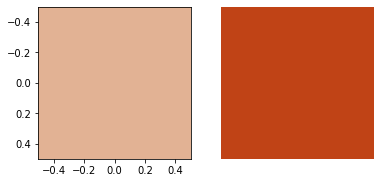

In [190]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2) 
plt.axis('off')
axarr[0].imshow([[[r[0],g[0],b[0]]]])
axarr[1].imshow([[[r[1],g[1],b[1]]]])